# **Task - 1:**

Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset.

• Use Data Augmentation to increase the number of training image.

• Use deeper model with BN and DropOut layer as presented above.

• Understand the Model Summary and Training Behavior.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#train image data
train_df = "/content/drive/MyDrive/AI and ML/week_five/FruitinAmazon/train"

#test image data
test_df = "/content/drive/MyDrive/AI and ML/week_five/FruitinAmazon/test"

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [ ]:
import os
# Get class names (subdirectories)
class_names = sorted(os.listdir(train_df))

if not class_names:
    print("No class directories found in the train folder!")
else:
    print(f"Found {len(class_names)} classes: {class_names}")

Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [ ]:
from PIL import Image, UnidentifiedImageError
corrupted_images = []  # List to store corrupted image paths

# Loop through each class folder and check for corrupted images
for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):  # Ensure it’s a valid directory
        images = os.listdir(class_path)
        for img_name in images:
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    img.verify()  # Verify image integrity
            except (IOError, UnidentifiedImageError):
                corrupted_images.append(img_path)

# Print results
if corrupted_images:
    print("\nCorrupted Images Found:")
    for img in corrupted_images:
        print(img)
else:
    print("\nNo corrupted images found.")



No corrupted images found.


In [ ]:
# Dictionary to store class counts
class_counts = {}

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_counts[class_name] = len(images)  # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
    print(f"{class_name:<25}{count:>15}")
print("=" * 45)


Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15


In [ ]:
selected_images = []  # Store image paths
selected_labels = []  # Store corresponding class names

for class_name in class_names:
    class_path = os.path.join(train_df, class_name)
    if os.path.isdir(class_path):
        images = [img for img in os.listdir(class_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if images:  # Ensure the class folder is not empty
            selected_img = os.path.join(class_path, random.choice(images))
            selected_images.append(selected_img)
            selected_labels.append(class_name)

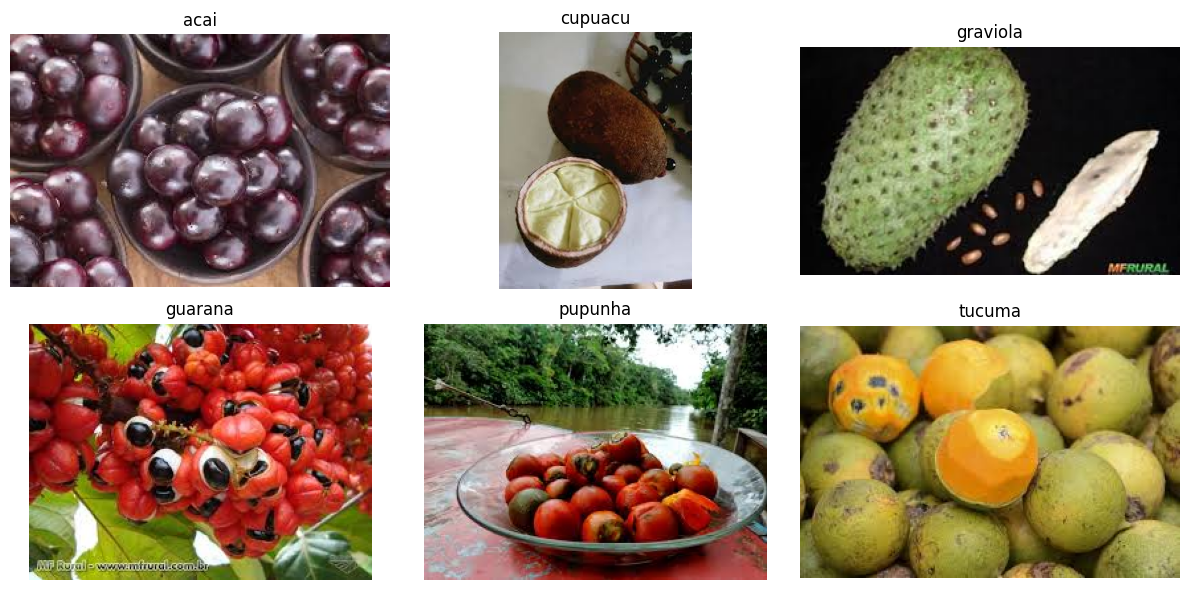

In [ ]:
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2  # Determine number of columns
rows = 2  # Fixed number of rows for layout

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i])
        ax.axis("off")
    else:
        ax.axis("off")  # Hide unused subplots

plt.tight_layout()
plt.show()

In [ ]:
def load_datasets(dataset_path, img_size=(128, 128), batch_size=32):
    train_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="training",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        dataset_path,
        validation_split=0.2,
        subset="validation",
        seed=42,
        image_size=img_size,
        batch_size=batch_size
    )
    return train_ds, val_ds

train_ds, val_ds = load_datasets(train_df)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
def build_cnn_model(input_shape, num_classes):
    cnn_model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return cnn_model

# Example usage:
input_shape = (128, 128, 3)
class_names = train_ds.class_names
cnn_model = build_cnn_model(input_shape, len(class_names))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
def compile_model(model):
    cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return cnn_model

# Example usage:
cnn_model = compile_model(cnn_model)
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def train_model(model, train_ds, val_ds, epochs=250, batch_size=16):
    callbacks = [
        keras.callbacks.ModelCheckpoint("best_model.h5", save_best_only=True),
        keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
    ]
    cnn_model.fit(train_ds, validation_data=val_ds, epochs=epochs, batch_size=batch_size, callbacks=callbacks)
    return cnn_model

# Example usage:
cnn_model = train_model(cnn_model, train_ds, val_ds)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.1701 - loss: 231.3941

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 664ms/step - accuracy: 0.1693 - loss: 247.0563 - val_accuracy: 0.2222 - val_loss: 255.1679
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.1551 - loss: 221.1286

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 0.1545 - loss: 210.5912 - val_accuracy: 0.1667 - val_loss: 78.0904
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.1302 - loss: 64.2709

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 494ms/step - accuracy: 0.1289 - loss: 63.3397 - val_accuracy: 0.1667 - val_loss: 39.0275
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1788 - loss: 30.5062

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 554ms/step - accuracy: 0.1862 - loss: 30.5046 - val_accuracy: 0.2778 - val_loss: 15.7276
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 621ms/step - accuracy: 0.3108 - loss: 12.7793

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 852ms/step - accuracy: 0.3060 - loss: 12.2295 - val_accuracy: 0.2222 - val_loss: 3.7167
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.5058 - loss: 1.8188

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 566ms/step - accuracy: 0.5009 - loss: 1.8748 - val_accuracy: 0.2222 - val_loss: 3.3976
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.5845 - loss: 1.2295

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 503ms/step - accuracy: 0.5877 - loss: 1.2030 - val_accuracy: 0.4444 - val_loss: 2.5185
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 530ms/step - accuracy: 0.7990 - loss: 0.7215 - val_accuracy: 0.3889 - val_loss: 2.5272
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 520ms/step - accuracy: 0.8555 - loss: 0.6475 - val_accuracy: 0.3889 - val_loss: 2.7270
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 761ms/step - accuracy: 0.8984 - loss: 0.4669 - val_accuracy: 0.3889 - val_loss: 2.8534
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 521ms/step - accuracy: 0.9193 - loss: 0.3763 - val_accuracy: 0.3889 - val_loss: 2.9173
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 511ms/step - accuracy: 0.9440 - loss: 0.2629 - val_accuracy: 0.3889 - val_loss: 3.0235
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - accuracy: 0.9891 - loss: 0.1398 - val_accuracy: 0.3889 - val_loss: 2.9850
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 512ms/step - accuracy: 0.9891 - loss: 0.0648 - val_accuracy: 0.3889 - val_loss

In [ ]:
def evaluate_model(model, test_ds):
    test_loss, test_acc = model.evaluate(test_ds)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Loss: {test_loss:.4f}")
    #return test_loss, test_acc

# Example usage:
evaluate_model(cnn_model, val_ds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.4444 - loss: 2.5185
Test Accuracy: 0.4444
Test Loss: 2.5185


In [ ]:
def save_model(model, filename="model.h5"):
    model.save(filename)

def load_model(filename="model.h5"):
    return keras.models.load_model(filename)

save_model(cnn_model)
cnn_model = load_model()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
def make_predictions(model, test_ds, class_names):
    y_true, y_pred = [], []

    for images, labels in test_ds:
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))
        y_true.extend(labels.numpy())

    print(classification_report(y_true, y_pred, target_names=class_names))

make_predictions(cnn_model, val_ds, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
              precision    recall  f1-score   support

        acai       0.60      1.00      0.75         3
     cupuacu       0.00      0.00      0.00         4
    graviola       0.20      1.00      0.33         1
     guarana       0.67      0.67      0.67         3
     pupunha       0.50      0.50      0.50         4
      tucuma       0.00      0.00      0.00         3

    accuracy                           0.44        18
   macro avg       0.33      0.53      0.38        18
weighted avg       0.33      0.44      0.37        18



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D, Dropout, BatchNormalization,
                                     Activation, Flatten, Dense)
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Define augmentation layers
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),  # Added zoom
    layers.RandomContrast(0.1),  # Added contrast
]

# Define augmentation function
def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [ ]:
# Build the model
model = Sequential([
    # Data augmentation using Lambda
    layers.Lambda(data_augmentation, input_shape=(128, 128, 3)),  #should match

    # Normalize pixel values to [0, 1]
    layers.Rescaling(1./255),

    # Block 1
    Conv2D(32, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Block 4
    Conv2D(256, (3, 3), padding='same', use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    # Flatten + Dense Layers
    Flatten(),

    Dense(512, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    Dense(256, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),

    # Output layer - 6 classes for your dataset
    Dense(6, activation='softmax')  # 6 classes, so 6 neurons
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=10, restore_best_weights=True)
]

# Train the model (assuming train_ds and val_ds are already loaded)
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2141 - loss: 2.3372

3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 4s/step - accuracy: 0.2196 - loss: 2.3116 - val_accuracy: 0.1667 - val_loss: 1.7888
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3806 - loss: 1.5266 - val_accuracy: 0.1667 - val_loss: 1.8026
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.4635 - loss: 1.3136 - val_accuracy: 0.0556 - val_loss: 1.8623
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5599 - loss: 1.1295 - val_accuracy: 0.0556 - val_loss: 2.0291
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5265 - loss: 1.3584 - val_accuracy: 0.0556 - val_loss: 2.2081
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6389 - loss: 0.9813 - val_accuracy: 0.0556 - val_loss: 2.3868
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6554 - loss: 0.8173 - val_accuracy: 0.0556 - val_loss: 2.5748
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.6506 - loss: 0.8857 - val_accuracy: 0.0556 - val_loss: 2.7026
Epoch 9/50
3/3 ━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Task - 2:**

To - Do:

• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset.

• Evaluate the model’s performance and generate an inference output and classification report.

• Did the performance improved compared to training from scratch.

Expected Deliverables:

• Trained Model: A trained model with the frozen layers and fine-tuned output layer.

• Inference Output: Predicted class labels for the validation dataset.

• Classification Report: A detailed classification report showing the performance of the model for
each class.

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet',  # Fixed quotes from curly to straight
                  include_top=False,
                  input_shape=(128, 128, 3))  # Input shape for VGG16


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Added dropout for regularization
x = Dense(512, activation='relu')(x)  # Added another dense layer
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

In [ ]:
# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model - CHANGED to sparse_categorical_crossentropy
model.compile(optimizer=Adam(learning_rate=0.0001),  # Lower learning rate
             loss='sparse_categorical_crossentropy',  # Changed from categorical
             metrics=['accuracy'])
# Callbacks
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

In [ ]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# Evaluate
test_loss, test_acc = model.evaluate(val_ds)
print(f"Transfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# Generate classification report
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1296 - loss: 15.7534

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.1319 - loss: 15.7477 - val_accuracy: 0.1111 - val_loss: 5.0227
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1424 - loss: 15.9656

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.1589 - loss: 15.5585 - val_accuracy: 0.1667 - val_loss: 3.9285
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2708 - loss: 12.4094

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.2656 - loss: 12.4651 - val_accuracy: 0.3889 - val_loss: 3.3864
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2112 - loss: 12.6720

3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 7s/step - accuracy: 0.2036 - loss: 12.5966 - val_accuracy: 0.3333 - val_loss: 3.1075
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2755 - loss: 8.4062

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.2726 - loss: 8.3777 - val_accuracy: 0.3333 - val_loss: 2.8511
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2350 - loss: 10.6612

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 6s/step - accuracy: 0.2352 - loss: 10.7169 - val_accuracy: 0.3333 - val_loss: 2.5139
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3189 - loss: 9.4349

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3260 - loss: 9.3615 - val_accuracy: 0.3889 - val_loss: 2.3471
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5226 - loss: 5.0481

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.5065 - loss: 5.3747 - val_accuracy: 0.4444 - val_loss: 2.1135
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3756 - loss: 6.5138

3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.3720 - loss: 6.5740 - val_accuracy: 0.5000 - val_loss: 1.7756
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3455 - loss: 6.5272

3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.3424 - loss: 6.7245 - val_accuracy: 0.5556 - val_loss: 1.5252
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3003 - loss: 8.5288

3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 7s/step - accuracy: 0.2982 - loss: 8.6176 - val_accuracy: 0.6667 - val_loss: 1.3836
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.5312 - loss: 4.0251 - val_accuracy: 0.7222 - val_loss: 1.3922
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.4162 - loss: 7.1856 - val_accuracy: 0.7222 - val_loss: 1.4910
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3819 - loss: 6.2318 - val_accuracy: 0.6667 - val_loss: 1.6400
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.4839 - loss: 4.0942 - val_accuracy: 0.6667 - val_loss: 1.7355
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 7s/step - accuracy: 0.5621 - loss: 3.8882 - val_accuracy: 0.6111 - val_loss: 1.8771
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.6667 - loss: 1.3836
Transfer Learning Model Accuracy: 0.6667
Transfer Learning Model Loss: 1.3836

Classification Report:
              precision    recall  f1-score   support

        acai       0.50      0.67  

In [ ]:
from sklearn.metrics import classification_report

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='training',
    seed=42
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    train_df,
    image_size=(128, 128),  # Original image size
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=42
)

class_names = train_ds.class_names
num_classes = len(class_names)

# 2. Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
])

# 3. Build Transfer Learning Model
inputs = keras.Input(shape=(128, 128, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Resizing(224, 224)(x)  # Resize to VGG16 expected input

# Load VGG16 base model
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)
base_model.trainable = False  # Freeze base model

x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)

model = keras.Model(inputs, outputs)

# 4. Compile the Model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

# 5. Train the Model
callbacks = [
    ModelCheckpoint("best_vgg_model.h5", save_best_only=True),
    EarlyStopping(patience=5, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30,
    callbacks=callbacks
)

# 6. Evaluate the Model
test_loss, test_acc = model.evaluate(val_ds)
print(f"\nTransfer Learning Model Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Model Loss: {test_loss:.4f}")

# 7. Generate Classification Report
y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images, verbose=0)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resizing (Resizing)                  │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,980,422 (57.15 MB)

 Trainable params: 265,734 (1.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1400 - loss: 2.0195 

3/3 ━━━━━━━━━━━━━━━━━━━━ 59s 18s/step - accuracy: 0.1398 - loss: 2.0150 - val_accuracy: 0.1111 - val_loss: 1.8473
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.1545 - loss: 1.9339 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.1576 - loss: 1.9363 - val_accuracy: 0.1667 - val_loss: 1.8366
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2598 - loss: 1.8262 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.2609 - loss: 1.8303 - val_accuracy: 0.1667 - val_loss: 1.8299
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.0943 - loss: 1.9204 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 23s/step - accuracy: 0.0985 - loss: 1.9179 - val_accuracy: 0.2222 - val_loss: 1.8229
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1557 - loss: 1.8819 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.1515 - loss: 1.8936 - val_accuracy: 0.2222 - val_loss: 1.8181
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 18s/step - accuracy: 0.2522 - loss: 1.7915 - val_accuracy: 0.1667 - val_loss: 1.8182
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2043 - loss: 1.8057 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.2088 - loss: 1.8089 - val_accuracy: 0.1667 - val_loss: 1.8159
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2448 - loss: 1.8207 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 18s/step - accuracy: 0.2461 - loss: 1.8129 - val_accuracy: 0.1667 - val_loss: 1.8112
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2043 - loss: 1.7906 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2088 - loss: 1.7827 - val_accuracy: 0.1667 - val_loss: 1.8074
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3067 - loss: 1.6689 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 17s/step - accuracy: 0.2960 - loss: 1.6793 - val_accuracy: 0.1667 - val_loss: 1.8030
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3148 - loss: 1.7050 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.3160 - loss: 1.6988 - val_accuracy: 0.1667 - val_loss: 1.7971
Epoch 12/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2205 - loss: 1.8117 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 23s/step - accuracy: 0.2174 - loss: 1.8162 - val_accuracy: 0.1667 - val_loss: 1.7903
Epoch 13/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2083 - loss: 1.7535 

3/3 ━━━━━━━━━━━━━━━━━━━━ 72s 18s/step - accuracy: 0.2188 - loss: 1.7491 - val_accuracy: 0.2222 - val_loss: 1.7834
Epoch 14/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2488 - loss: 1.7728 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2561 - loss: 1.7641 - val_accuracy: 0.2778 - val_loss: 1.7776
Epoch 15/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2853 - loss: 1.6522 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.2834 - loss: 1.6681 - val_accuracy: 0.2778 - val_loss: 1.7713
Epoch 16/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.1840 - loss: 1.7962 

3/3 ━━━━━━━━━━━━━━━━━━━━ 57s 18s/step - accuracy: 0.1901 - loss: 1.7864 - val_accuracy: 0.3889 - val_loss: 1.7633
Epoch 17/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2853 - loss: 1.7097 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.2834 - loss: 1.7095 - val_accuracy: 0.3889 - val_loss: 1.7547
Epoch 18/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4149 - loss: 1.6356 

3/3 ━━━━━━━━━━━━━━━━━━━━ 71s 18s/step - accuracy: 0.4154 - loss: 1.6345 - val_accuracy: 0.4444 - val_loss: 1.7477
Epoch 19/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.3368 - loss: 1.6552 

3/3 ━━━━━━━━━━━━━━━━━━━━ 81s 18s/step - accuracy: 0.3255 - loss: 1.6583 - val_accuracy: 0.3889 - val_loss: 1.7428
Epoch 20/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2980 - loss: 1.7324 

3/3 ━━━━━━━━━━━━━━━━━━━━ 56s 18s/step - accuracy: 0.3103 - loss: 1.7255 - val_accuracy: 0.3333 - val_loss: 1.7406
Epoch 21/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.3121 - loss: 1.6807 - val_accuracy: 0.3333 - val_loss: 1.7410
Epoch 22/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.3501 - loss: 1.6195 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.3494 - loss: 1.6167 - val_accuracy: 0.3889 - val_loss: 1.7386
Epoch 23/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2755 - loss: 1.6165 

3/3 ━━━━━━━━━━━━━━━━━━━━ 73s 18s/step - accuracy: 0.2726 - loss: 1.6241 - val_accuracy: 0.3889 - val_loss: 1.7369
Epoch 24/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2344 - loss: 1.7507 

3/3 ━━━━━━━━━━━━━━━━━━━━ 91s 23s/step - accuracy: 0.2383 - loss: 1.7447 - val_accuracy: 0.3889 - val_loss: 1.7320
Epoch 25/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.2940 - loss: 1.6331 

3/3 ━━━━━━━━━━━━━━━━━━━━ 65s 22s/step - accuracy: 0.3003 - loss: 1.6278 - val_accuracy: 0.4444 - val_loss: 1.7257
Epoch 26/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.2899 - loss: 1.6349 

3/3 ━━━━━━━━━━━━━━━━━━━━ 55s 18s/step - accuracy: 0.2904 - loss: 1.6366 - val_accuracy: 0.4444 - val_loss: 1.7225
Epoch 27/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13s/step - accuracy: 0.4051 - loss: 1.5954 

3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 18s/step - accuracy: 0.4045 - loss: 1.5978 - val_accuracy: 0.4444 - val_loss: 1.7218
Epoch 28/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.4190 - loss: 1.5870 

3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 23s/step - accuracy: 0.4253 - loss: 1.5796 - val_accuracy: 0.4444 - val_loss: 1.7218
Epoch 29/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 82s 22s/step - accuracy: 0.2934 - loss: 1.7010 - val_accuracy: 0.4444 - val_loss: 1.7224
Epoch 30/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 83s 22s/step - accuracy: 0.3073 - loss: 1.6346 - val_accuracy: 0.4444 - val_loss: 1.7227
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.4444 - loss: 1.7218

Transfer Learning Model Accuracy: 0.4444
Transfer Learning Model Loss: 1.7218

Classification Report:
              precision    recall  f1-score   support

        acai       0.50      0.33      0.40         3
     cupuacu       0.50      0.75      0.60         4
    graviola       0.50      1.00      0.67         1
     guarana       0.40      0.67      0.50         3
     pupunha       0.00      0.00      0.00         4
      tucuma       0.33      0.33      0.33         3

    accuracy                           0.44        18
   macro avg       0.37  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
